In [4]:
import pandas as pd
import numpy as np

# File paths 
sleep_file = 'raw_data/Sleep_health_and_lifestyle_dataset.csv'  
diabetes_file = 'raw_data/diabetes_012_health_indicators_BRFSS2015.csv'  
heart_file = 'raw_data/Heart_Disease_Prediction.csv' 

print("Data Quality Check & Cleaning Started.")

# 1. Sleep Dataset: Initial check and cleaning
print("\n=== Sleep Dataset ===")
sleep_df = pd.read_csv(sleep_file)
sleep_df.info()  # Print dtypes and non-null counts
print("Missings:\n", sleep_df.isnull().sum())  # Shows missing values
print("Duplicates:", sleep_df.duplicated().sum())

# Fill missing in Sleep Disorder (based on checks: 219 missings)
sleep_df['Sleep Disorder'].fillna('None', inplace=True)

# Standardize BMI Category - merge 'Normal' and 'Normal Weight' into just 'Normal'
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace({'Normal Weight': 'Normal'})

# Verify the unique categories in BMI
print("\nUnique BMI Categories after merging:", sleep_df['BMI Category'].unique())

# Verify and save
print("Cleaned missings:\n", sleep_df.isnull().sum())  # All 0
print("Cleaned shape:", sleep_df.shape)  # (374, 13)
sleep_df.to_csv('cleaned_data/clean_sleep.csv', index=False)
print("Sleep cleaned and saved!")

Data Quality Check & Cleaning Started.

=== Sleep Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int

/var/folders/2n/k_y_w7fn6h5bylprx7vm9dsh0000gn/T/ipykernel_11175/1372289324.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sleep_df['Sleep Disorder'].fillna('None', inplace=True)


In [2]:
# 2. Diabetes Dataset: Initial check and cleaning
print("\n=== Diabetes Dataset ===")
diabetes_df = pd.read_csv(diabetes_file)
print("Raw shape:", diabetes_df.shape)
print("Raw missings:\n", diabetes_df.isnull().sum())  # All 0
raw_duplicates = diabetes_df.duplicated().sum()  # Dynamic count
print("Raw duplicates:", raw_duplicates)  # 23899

# Drop duplicates (based on check)
diabetes_df = diabetes_df.drop_duplicates()
print("Duplicates removed:", raw_duplicates)

# Verify and save (no other changes needed)
print("Cleaned missings:\n", diabetes_df.isnull().sum())  # All 0
print("Cleaned shape:", diabetes_df.shape)  # ~229,781
diabetes_df.to_csv('cleaned_data/clean_diabetes.csv', index=False)
print("Diabetes cleaned and saved!")


=== Diabetes Dataset ===
Raw shape: (253680, 22)
Raw missings:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Raw duplicates: 23899
Duplicates removed: 23899
Cleaned missings:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                

In [3]:
# 3. Heart Dataset: Initial check and cleaning
print("\n=== Heart Dataset ===")
heart_df = pd.read_csv(heart_file)
print("Raw shape:", heart_df.shape)
print("Raw missings:\n", heart_df.isnull().sum())  # All 0
print("Raw duplicates:", heart_df.duplicated().sum())  # 0

# No transformations needed, just drop duplicates if any (there are none)
heart_df = heart_df.drop_duplicates()

# Verify and save 
print("Cleaned missings:\n", heart_df.isnull().sum())  # All 0
print("Cleaned shape:", heart_df.shape)  # (270, 15)
heart_df.to_csv('cleaned_data/clean_heart.csv', index=False)
print("Heart checked and saved (no changes needed)!")

print("\nAll datasets cleaned and ready for analysis.")


=== Heart Dataset ===
Raw shape: (270, 15)
Raw missings:
 index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
Raw duplicates: 0
Cleaned missings:
 index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
Cleaned 

Frequency - BMI Category:
 BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


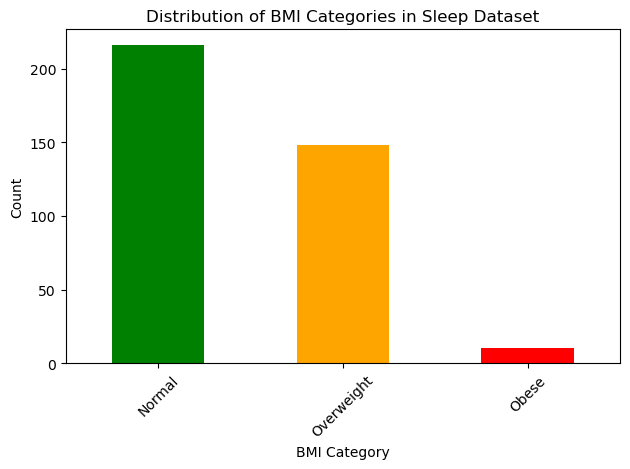

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
sleep_df = pd.read_csv('cleaned_data/clean_sleep.csv')

# 1. BMI Frequency (Bar Chart)
bmi_freq = sleep_df['BMI Category'].value_counts()
print("Frequency - BMI Category:\n", bmi_freq)
bmi_freq.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of BMI Categories in Sleep Dataset')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bmi_distribution.png')
plt.show()

[[1.         0.21236031]
 [0.21236031 1.        ]]


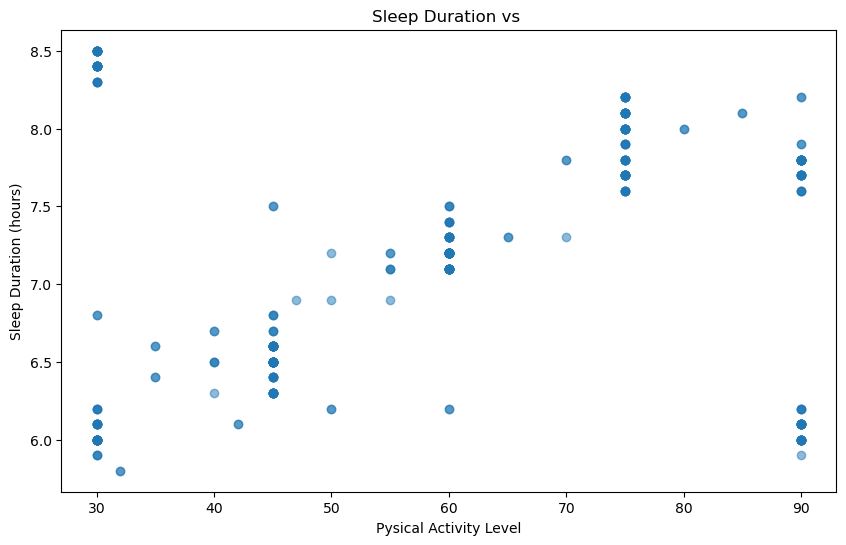

In [15]:
y = sleep_df['Sleep Duration']
x = sleep_df['Physical Activity Level']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Sleep Duration vs ')
plt.ylabel('Sleep Duration (hours)')
plt.xlabel('Pysical Activity Level')

print(np.corrcoef(x, y))

Text(0.05, 0.95, 'Correlation: 0.212')

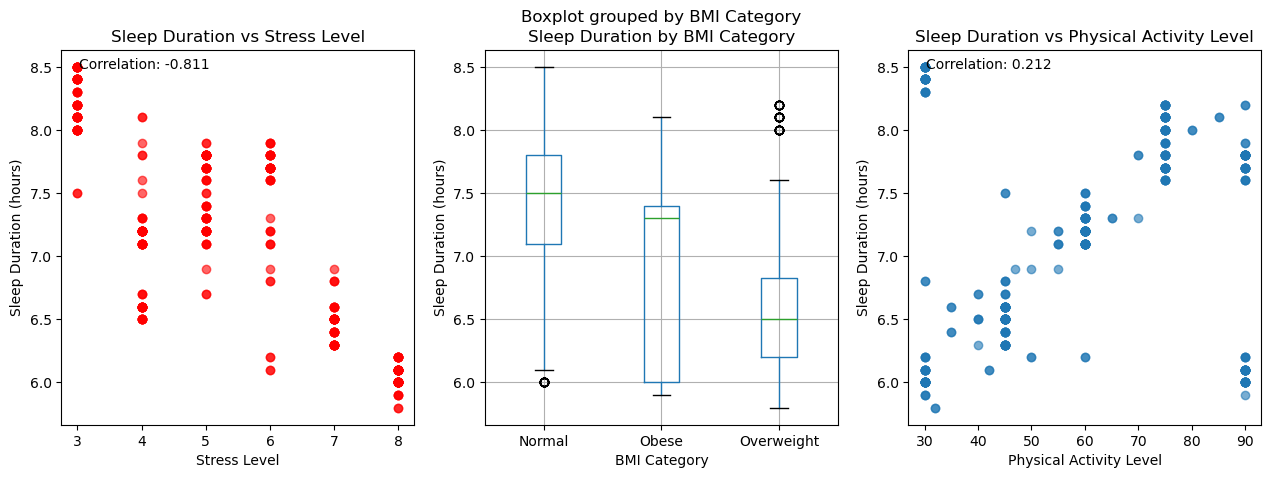

In [6]:
# Focus on the 2-3 most meaningful insights:

# 1. STRESS IMPACT ON SLEEP (Strongest relationship)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(sleep_df['Stress Level'], sleep_df['Sleep Duration'], alpha=0.6, color='red')
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
correlation_stress = np.corrcoef(sleep_df['Stress Level'], sleep_df['Sleep Duration'])[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation_stress:.3f}', transform=plt.gca().transAxes)

# 2. BMI IMPACT ON SLEEP (Clear categorical differences)
plt.subplot(1, 3, 2)
sleep_df.boxplot(column='Sleep Duration', by='BMI Category', ax=plt.gca())
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')

# 3. PHYSICAL ACTIVITY IMPACT (Lifestyle factor)
plt.subplot(1, 3, 3)
plt.scatter(sleep_df['Physical Activity Level'], sleep_df['Sleep Duration'], alpha=0.6)
plt.title('Sleep Duration vs Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
correlation_activity = np.corrcoef(sleep_df['Physical Activity Level'], sleep_df['Sleep Duration'])[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation_activity:.3f}', transform=plt.gca().transAxes)

Descriptive Stats - Risk Indicators:
              BMI        Age    GenHlth
count  229781.00  229781.00  229781.00
mean       28.69       8.09       2.60
std         6.79       3.09       1.06
min        12.00       1.00       1.00
25%        24.00       6.00       2.00
50%        27.00       8.00       3.00
75%        32.00      10.00       3.00
max        98.00      13.00       5.00


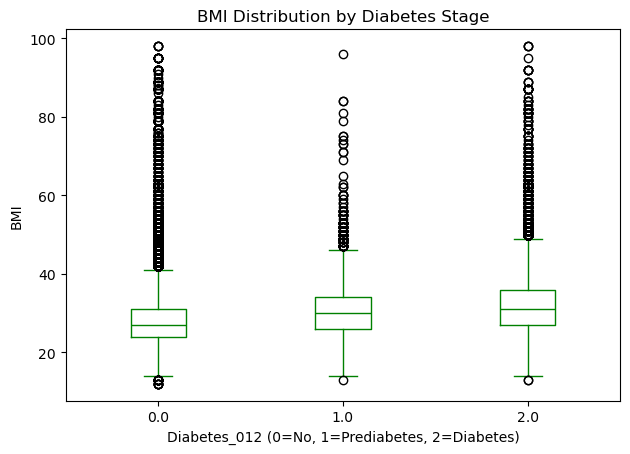

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
diabetes_df = pd.read_csv('cleaned_data/clean_diabetes.csv')

# 1. Risk Indicators Descriptive (Boxplot)
print("Descriptive Stats - Risk Indicators:\n", diabetes_df[['BMI', 'Age', 'GenHlth']].describe().round(2))
diabetes_df.boxplot(column='BMI', by='Diabetes_012', grid=False, color='green')
plt.title('BMI Distribution by Diabetes Stage')
plt.suptitle('')
plt.xlabel('Diabetes_012 (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig('bmi_by_diabetes.png')
plt.show()

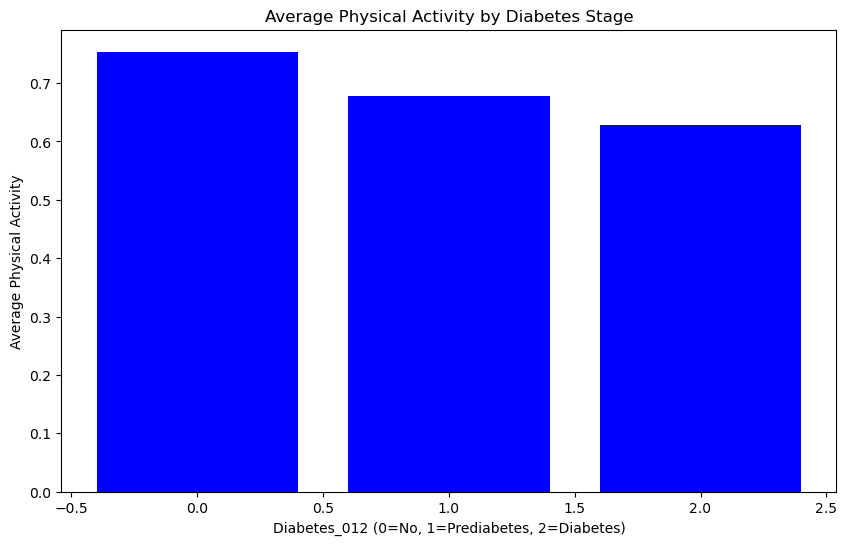

In [23]:
# Group physical activity by diabetes stage
activity_by_diabetes = diabetes_df.groupby('Diabetes_012')['PhysActivity'].mean()

plt.figure(figsize=(10, 6))
plt.bar(activity_by_diabetes.index, activity_by_diabetes.values, color='blue')
plt.title('Average Physical Activity by Diabetes Stage')
plt.xlabel('Diabetes_012 (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('Average Physical Activity')
plt.show()



Diabetes Health Analysis: Impact of Life Factors on Health Outcomes


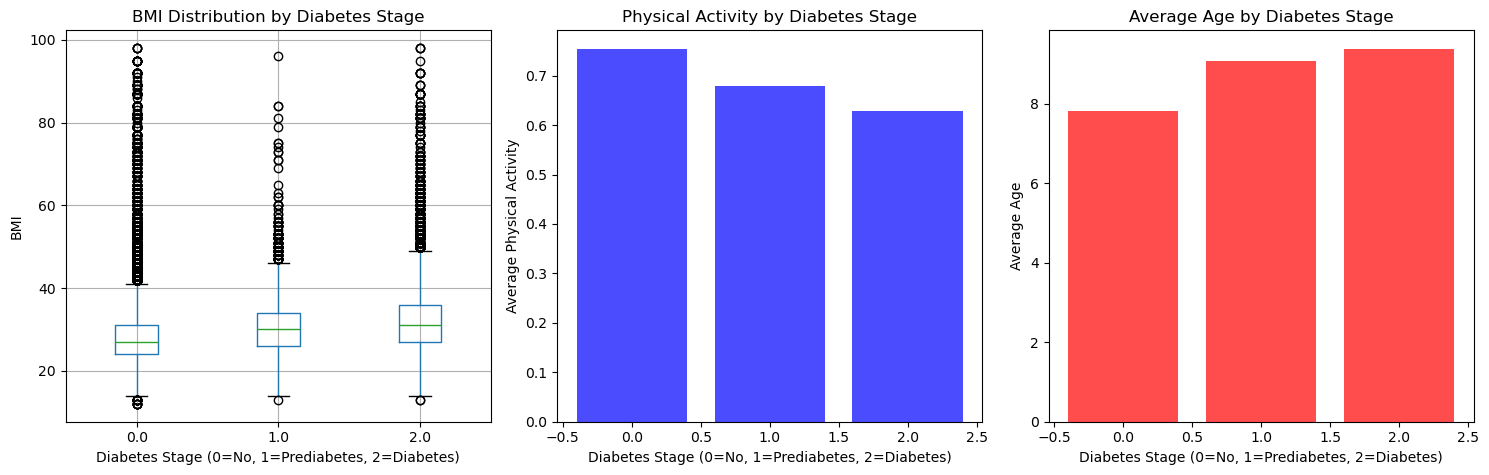


Key Insights:
1. BMI increases with diabetes progression
2. Physical activity decreases with diabetes progression
3. Age increases with diabetes progression

Average Values by Diabetes Stage:
                BMI  PhysActivity   Age
Diabetes_012                           
0.0           28.03          0.75  7.82
1.0           30.73          0.68  9.08
2.0           31.96          0.63  9.38


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
diabetes_df = pd.read_csv('cleaned_data/clean_diabetes.csv')

print("Diabetes Health Analysis: Impact of Life Factors on Health Outcomes")
print("="*60)

# Focus on 3 meaningful insights
plt.figure(figsize=(15, 5))

# 1. BMI IMPACT ON DIABETES (Your existing analysis - enhanced)
plt.subplot(1, 3, 1)
diabetes_df.boxplot(column='BMI', by='Diabetes_012', ax=plt.gca())
plt.suptitle('')  # Remove default title
plt.title('BMI Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('BMI')

# 2. PHYSICAL ACTIVITY IMPACT (Your selected code - enhanced)
plt.subplot(1, 3, 2)
activity_by_diabetes = diabetes_df.groupby('Diabetes_012')['PhysActivity'].mean()
plt.bar(activity_by_diabetes.index, activity_by_diabetes.values, color='blue', alpha=0.7)
plt.title('Physical Activity by Diabetes Stage')
plt.xlabel('Diabetes Stage (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('Average Physical Activity')

# 3. AGE IMPACT ON DIABETES (New insight)
plt.subplot(1, 3, 3)
age_by_diabetes = diabetes_df.groupby('Diabetes_012')['Age'].mean()
plt.bar(age_by_diabetes.index, age_by_diabetes.values, color='red', alpha=0.7)
plt.title('Average Age by Diabetes Stage')
plt.xlabel('Diabetes Stage (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('Average Age')

plt.tight_layout()
plt.savefig('diabetes_health_insights.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print(f"\nKey Insights:")
print(f"1. BMI increases with diabetes progression")
print(f"2. Physical activity decreases with diabetes progression")
print(f"3. Age increases with diabetes progression")

# Statistical summary
diabetes_summary = diabetes_df.groupby('Diabetes_012').agg({
    'BMI': 'mean',
    'PhysActivity': 'mean',
    'Age': 'mean'
}).round(2)
print(f"\nAverage Values by Diabetes Stage:")
print(diabetes_summary)

Descriptive Stats - Heart Metrics:
           Age      BP  Cholesterol
count  270.00  270.00       270.00
mean    54.43  131.34       249.66
std      9.11   17.86        51.69
min     29.00   94.00       126.00
25%     48.00  120.00       213.00
50%     55.00  130.00       245.00
75%     61.00  140.00       280.00
max     77.00  200.00       564.00


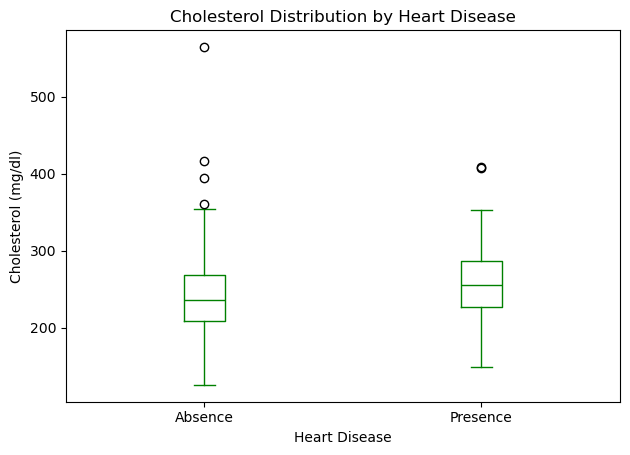

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
heart_df = pd.read_csv('cleaned_data/clean_heart.csv')

# 1. Heart Metrics Descriptive (Boxplot)
print("Descriptive Stats - Heart Metrics:\n", heart_df[['Age', 'BP', 'Cholesterol']].describe().round(2))
heart_df.boxplot(column='Cholesterol', by='Heart Disease', grid=False, color='green')
plt.title('Cholesterol Distribution by Heart Disease')
plt.suptitle('')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (mg/dl)')
plt.tight_layout()
plt.savefig('cholesterol_by_heart.png')
plt.show()

[[1.         0.17301918]
 [0.17301918 1.        ]]


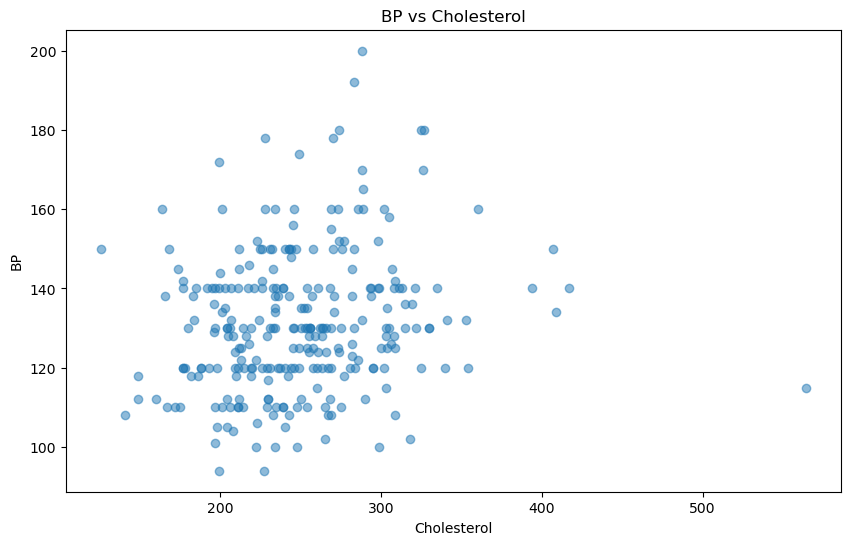

In [28]:
y = heart_df['BP']
x = heart_df['Cholesterol']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('BP vs Cholesterol')
plt.ylabel('BP')
plt.xlabel('Cholesterol')

print(np.corrcoef(x, y))


Heart Disease Rate by Exercise Angina:
Exercise angina
0    0.298343
1    0.741573
Name: Heart Disease, dtype: float64


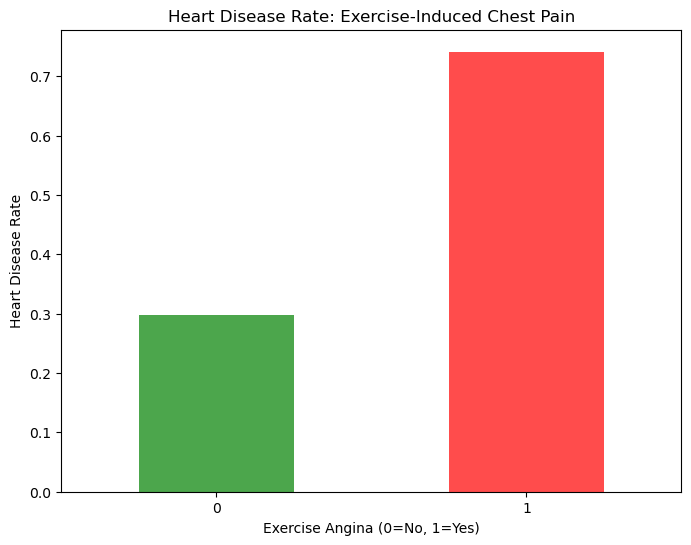

In [29]:
# Exercise Angina (chest pain during exercise) vs Heart Disease
exercise_heart = heart_df.groupby('Exercise angina')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())
print("Heart Disease Rate by Exercise Angina:")
print(exercise_heart)

# Visualization
plt.figure(figsize=(8, 6))
exercise_heart.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Heart Disease Rate: Exercise-Induced Chest Pain')
plt.xlabel('Exercise Angina (0=No, 1=Yes)')
plt.ylabel('Heart Disease Rate')
plt.xticks(rotation=0)
plt.show()

/var/folders/2n/k_y_w7fn6h5bylprx7vm9dsh0000gn/T/ipykernel_34584/4157675883.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_heart = heart_df.groupby('Age_Group')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())


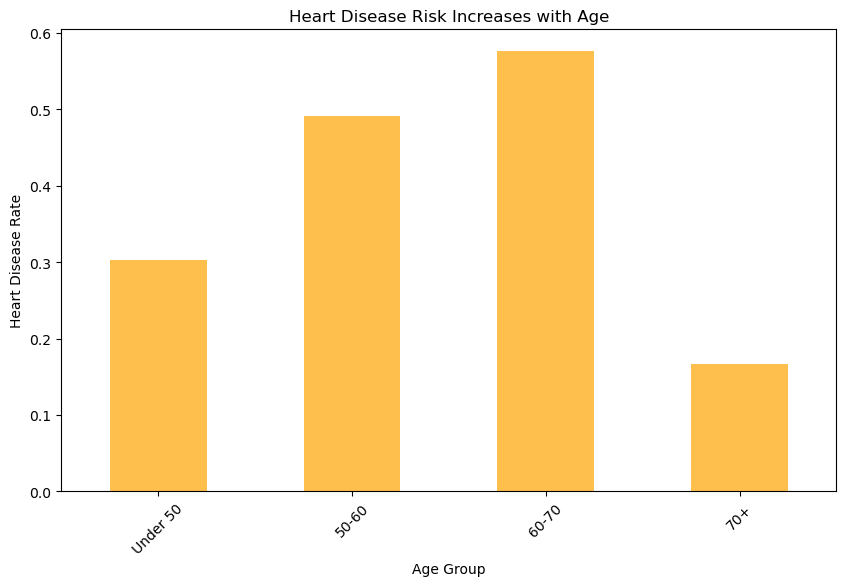

In [30]:
# Age groups and heart disease
heart_df['Age_Group'] = pd.cut(heart_df['Age'], bins=[0, 50, 60, 70, 100], 
                               labels=['Under 50', '50-60', '60-70', '70+'])
age_heart = heart_df.groupby('Age_Group')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())

plt.figure(figsize=(10, 6))
age_heart.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Heart Disease Risk Increases with Age')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Rate')
plt.xticks(rotation=45)
plt.show()

Heart Disease Analysis: Impact of Life Factors on Health Outcomes


/var/folders/2n/k_y_w7fn6h5bylprx7vm9dsh0000gn/T/ipykernel_11175/3340517832.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_heart = heart_df.groupby('Age_Group')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())


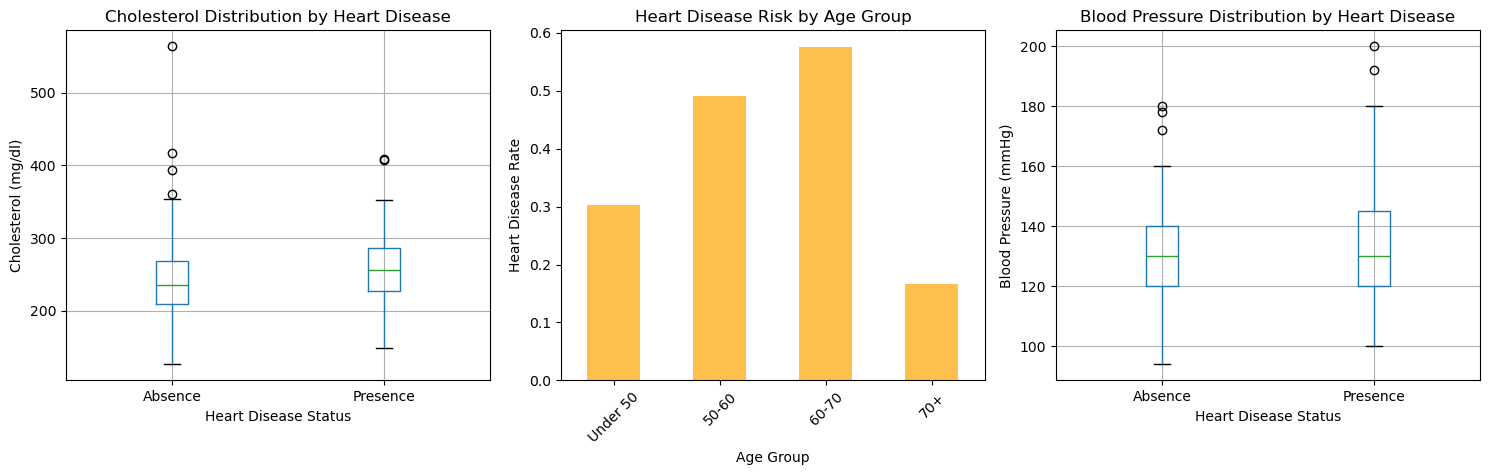


Key Insights:
1. Higher cholesterol levels associated with heart disease
2. Heart disease risk increases significantly with age
3. Higher blood pressure associated with heart disease

Average Values by Heart Disease Status:
               Cholesterol      BP    Age
Heart Disease                            
Absence             244.21  128.87  52.71
Presence            256.47  134.44  56.59

Dataset Overview:
• Total Records: 270
• Heart Disease Rate: 44.4%
• Average Cholesterol: 250 mg/dl
• Average Blood Pressure: 131 mmHg


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
heart_df = pd.read_csv('cleaned_data/clean_heart.csv')

print("Heart Disease Analysis: Impact of Life Factors on Health Outcomes")
print("="*60)

# Focus on 3 meaningful insights
plt.figure(figsize=(15, 5))

# 1. CHOLESTEROL IMPACT ON HEART DISEASE (Your existing analysis - enhanced)
plt.subplot(1, 3, 1)
heart_df.boxplot(column='Cholesterol', by='Heart Disease', ax=plt.gca())
plt.suptitle('')  # Remove default title
plt.title('Cholesterol Distribution by Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('Cholesterol (mg/dl)')

# 2. AGE IMPACT ON HEART DISEASE (Your selected code - enhanced)
plt.subplot(1, 3, 2)
heart_df['Age_Group'] = pd.cut(heart_df['Age'], bins=[0, 50, 60, 70, 100], 
                               labels=['Under 50', '50-60', '60-70', '70+'])
age_heart = heart_df.groupby('Age_Group')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())
age_heart.plot(kind='bar', color='orange', alpha=0.7, ax=plt.gca())
plt.title('Heart Disease Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Rate')
plt.xticks(rotation=45)

# 3. BLOOD PRESSURE IMPACT ON HEART DISEASE (New insight)
plt.subplot(1, 3, 3)
heart_df.boxplot(column='BP', by='Heart Disease', ax=plt.gca())
plt.suptitle('')  # Remove default title
plt.title('Blood Pressure Distribution by Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('Blood Pressure (mmHg)')

plt.tight_layout()
plt.savefig('heart_disease_insights.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print(f"\nKey Insights:")
print(f"1. Higher cholesterol levels associated with heart disease")
print(f"2. Heart disease risk increases significantly with age")
print(f"3. Higher blood pressure associated with heart disease")

# Statistical summary
heart_summary = heart_df.groupby('Heart Disease').agg({
    'Cholesterol': 'mean',
    'BP': 'mean',
    'Age': 'mean'
}).round(2)
print(f"\nAverage Values by Heart Disease Status:")
print(heart_summary)

# Additional insights
print(f"\nDataset Overview:")
print(f"• Total Records: {len(heart_df)}")
print(f"• Heart Disease Rate: {(heart_df['Heart Disease'] == 'Presence').mean()*100:.1f}%")
print(f"• Average Cholesterol: {heart_df['Cholesterol'].mean():.0f} mg/dl")
print(f"• Average Blood Pressure: {heart_df['BP'].mean():.0f} mmHg")

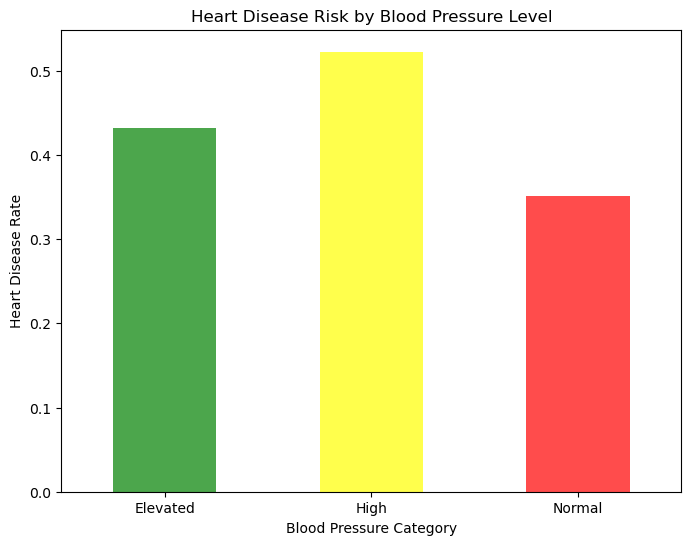

In [31]:
# Blood pressure categories
def categorize_bp(bp):
    if bp < 120:
        return 'Normal'
    elif bp < 140:
        return 'Elevated'
    else:
        return 'High'

heart_df['BP_Category'] = heart_df['BP'].apply(categorize_bp)
bp_heart = heart_df.groupby('BP_Category')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())

plt.figure(figsize=(8, 6))
bp_heart.plot(kind='bar', color=['green', 'yellow', 'red'], alpha=0.7)
plt.title('Heart Disease Risk by Blood Pressure Level')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Heart Disease Rate')
plt.xticks(rotation=0)
plt.show()

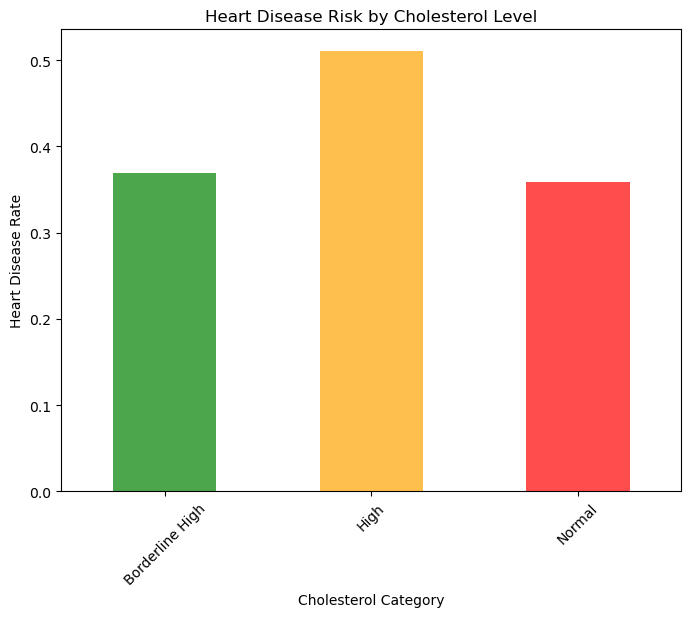

In [32]:
# Cholesterol categories
def categorize_cholesterol(chol):
    if chol < 200:
        return 'Normal'
    elif chol < 240:
        return 'Borderline High'
    else:
        return 'High'

heart_df['Chol_Category'] = heart_df['Cholesterol'].apply(categorize_cholesterol)
chol_heart = heart_df.groupby('Chol_Category')['Heart Disease'].apply(lambda x: (x == 'Presence').mean())

plt.figure(figsize=(8, 6))
chol_heart.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Heart Disease Risk by Cholesterol Level')
plt.xlabel('Cholesterol Category')
plt.ylabel('Heart Disease Rate')
plt.xticks(rotation=45)
plt.show()